# PISA 2012 Data Exploration

### by Vasilij Laparidi

## Table of Contents
<ul>
<li><a href="#prelim">Preliminary Wrangling</a></li>
<li><a href="#wrang">Data Wrangling</a></li>
<li><a href="#explorat">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#univar">Univariate Exploration</a></li>
        <li><a href="#bivar">Bivariate Exploration</a></li>
        <li><a href="#multivar">Multivariate Exploration</a></li>
    </ul>
<li><a href="#conclus">Conclusions</a></li>
</ul>

# Intro
In this project we analyse the PISA study of 2012. The PISA (Programme for International Student Assessment) is a worldwide study by the OECD (Organisation for Economic Co-operation and Development) to evaluate different educational systems. 15-year-old pupils from different countries were measured on mathematics, science and reading.


# What is being analysed?

In this project we would like to gain more insight into the possible influences of age and sex. Above all, we would like to learn more about the possible hurdles that may arise from the role of parents, family structure and a migration background.

## Preliminary Wrangling

First we check the data set to become familiar with it. Then we can decide which columns and rows we need to clean up and use for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Exploratory Data Analysis

In [2]:
pisa_clean = pd.read_csv('pisa_data_clean.csv')

### Univariate Exploration


## Different distributions

The following graphs show the distribution of the key figures relevant for us in the data set.


Let's check the distribution of the results.

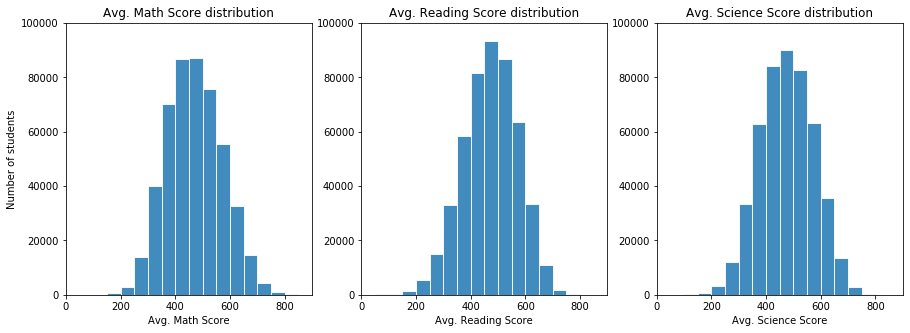

In [3]:
#create three histograms by using plt.hist and plt.subplot

plt.figure(figsize = [15,5])
bins = np.arange(0, 900, 50)

plt.subplot(1, 3, 1)
plt.hist(pisa_clean['Avg. Math Score'], bins = bins, ec = 'white', alpha = 0.85);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks()
plt.xlabel('Avg. Math Score');
plt.ylabel('Number of students')
plt.title("Avg. Math Score distribution");

plt.subplot(1, 3, 2)
plt.hist(pisa_clean['Avg. Reading Score'], bins = bins, ec = 'white', alpha = 0.85);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks()
plt.xlabel('Avg. Reading Score');
plt.title("Avg. Reading Score distribution");

plt.subplot(1, 3, 3)
plt.hist(pisa_clean['Avg. Science Score'], bins = bins, ec = 'white', alpha = 0.85);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks()
plt.xlabel('Avg. Science Score');
plt.title("Avg. Science Score distribution");


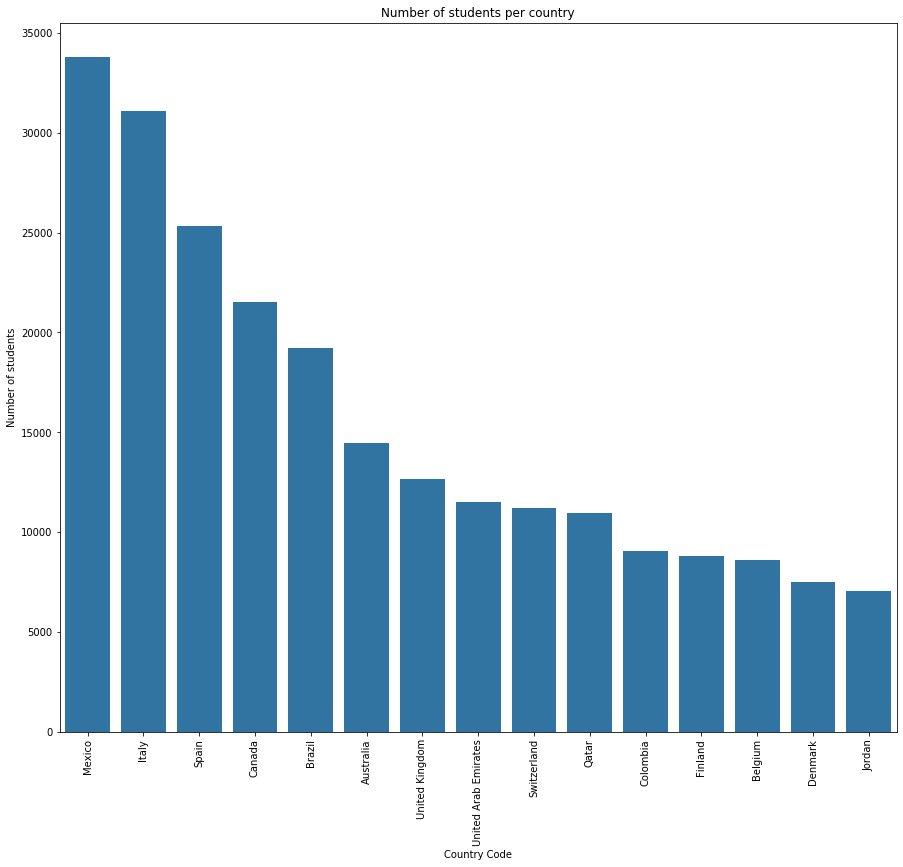

In [4]:
#create a counterplot by using seaborn.

plt.figure(figsize = [15, 60])
base_color = sb.color_palette()[0]

plt.subplot(4, 1, 1)
sb.countplot(data = pisa_clean, x = 'Country Code', color = base_color, order=pisa_clean['Country Code'].value_counts().index[:15])
plt.title('Number of students per country')
plt.ylabel('Number of students')
plt.xticks(rotation=90);


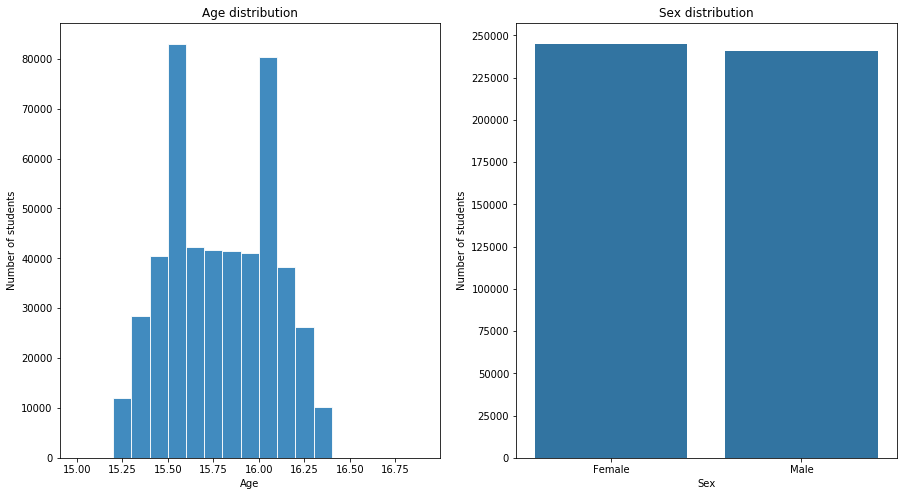

In [5]:
#create two counterplots for 'Age' and 'Sex' by using plt.subplot again to arrange them both side by side.
plt.figure(figsize=[15, 8]);
bins_age = np.arange(15, 17, 0.1)

plt.subplot(1, 2, 1)

plt.hist(pisa_clean['Age'], bins = bins_age, ec = 'white', alpha = 0.85);
plt.xlabel('Age');
plt.ylabel('Number of students')
plt.title("Age distribution");



plt.subplot(1, 2, 2);
sb.countplot(x = 'Sex', data = pisa_clean, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 250000 + 1, 25000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Number of students");
plt.title('Sex distribution');


In [6]:
#due to the fact, that we changed 'Father at Home' and 'Mother at Home' into 1 and 0 we can now just add up the both and check if 'Parent at Home'.
#we replace the numbers as followed:
pisa_clean['Parent at Home'] = pisa_clean['Father at Home'] + pisa_clean['Mother at Home']
pisa_clean['Parent at Home'] = pisa_clean['Parent at Home'].replace({0: 'Zero', 1: 'One', 2: 'Two'})

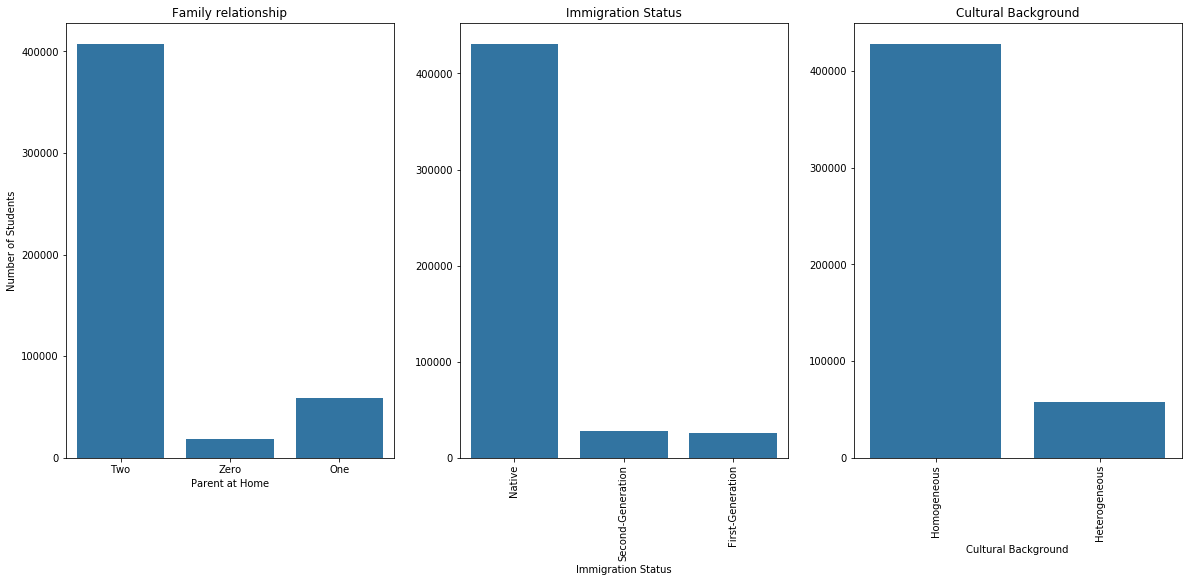

In [7]:
#now using again a counterplot with subplot.
plt.figure(figsize=[20, 8]);
y_ticks = np.arange(0, 450000 + 1, 100000)

plt.subplot(1, 3, 1, )

sb.countplot(x = 'Parent at Home', data = pisa_clean, color = sb.color_palette()[0]);

plt.yticks(y_ticks, y_ticks);
plt.ylabel("Number of Students");
plt.title('Family relationship');

plt.subplot(1, 3, 2)

sb.countplot(x = 'Immigration Status', data = pisa_clean, color = sb.color_palette()[0]);
plt.yticks(y_ticks, y_ticks);
plt.ylabel("");
plt.title('Immigration Status');
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)

sb.countplot(x = 'Cultural Background', data = pisa_clean, color = sb.color_palette()[0]);
plt.yticks(y_ticks, y_ticks);
plt.ylabel("");
plt.title('Cultural Background');
plt.xticks(rotation=90);



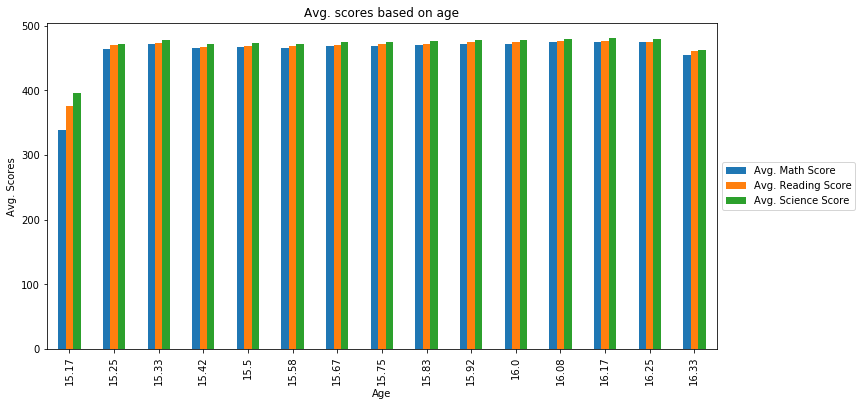

In [8]:
#to analyze the age groups we have to use goupby by age first. Then using a Bar-Chart
#also we have to arrange the legend by using plt.legend
age_groupby = pisa_clean.groupby(['Age']).mean()[['Avg. Math Score', 'Avg. Reading Score', 'Avg. Science Score']]
f = plt.figure(figsize=[12, 6])
plt.ylabel('Avg. Scores')
plt.title('Avg. scores based on age')
age_groupby.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show();

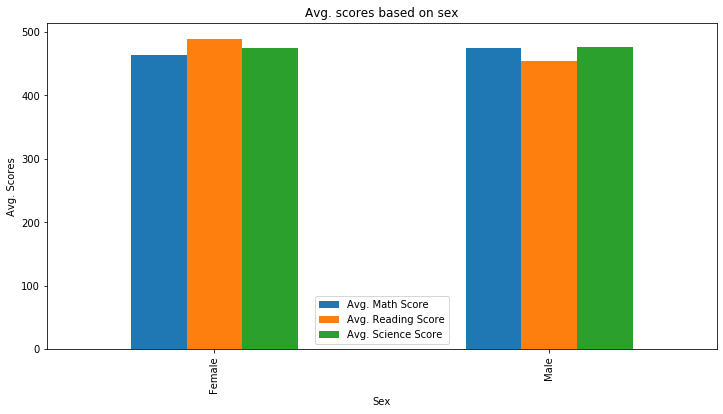

In [9]:
#now we have to group the data by 'sex' and then post a bar-chart again.
sex_groupby = pisa_clean.groupby(['Sex']).mean()[['Avg. Math Score', 'Avg. Reading Score', 'Avg. Science Score']]
f = plt.figure(figsize=[12, 6])
plt.ylabel('Avg. Scores')
plt.title('Avg. scores based on sex')
sex_groupby.plot(kind='bar', ax=f.gca())

plt.show();

In [10]:
pisa_clean['Parent at Home'].value_counts()

Two     407696
One      59161
Zero     18633
Name: Parent at Home, dtype: int64

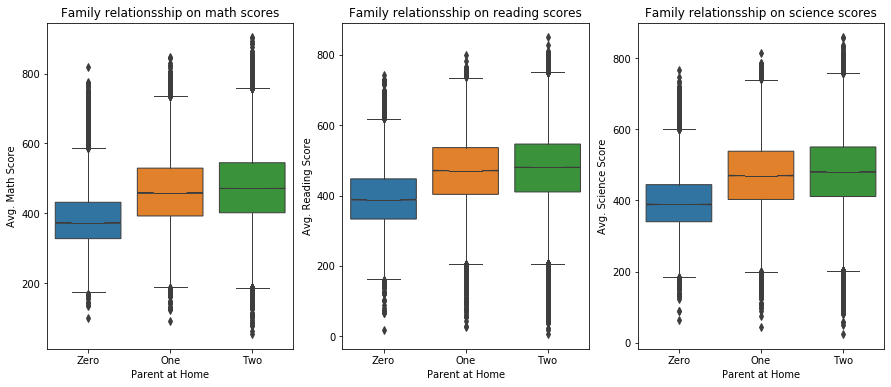

In [11]:
#now we use a boxplot with seaborn. also we need to order the data first and arrange the charts with subplot.
plt.figure(figsize = [15, 6])

order = ['Zero', 'One', 'Two']
plt.subplot(1, 3, 1)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Math Score'], order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on math scores');

plt.subplot(1, 3, 2)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Reading Score'], order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on reading scores');

plt.subplot(1, 3, 3)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Science Score'], order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on science scores');

## Immigration Status

Next we check whether pupils with a migration background have different results than pupils without.
We can observe that the migration background has an influence on the results. However, it does not seem to be particularly relevant. We will take a closer look at this in a later chart.


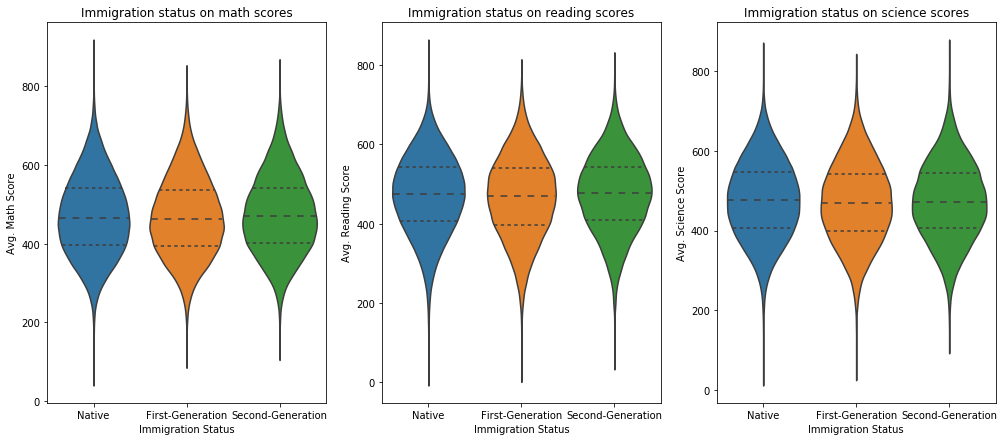

In [12]:
#now using a seaborn violinplot, order it and place the 'inner = 'quartile' for better visualization.
plt.figure(figsize = [17, 7])
order = ['Native', 'First-Generation', 'Second-Generation']

plt.subplot(1, 3, 1)
sb.violinplot(x = pisa_clean['Immigration Status'], y = pisa_clean['Avg. Math Score'],
              inner = "quartile", order=order);
plt.title('Immigration status on math scores');

plt.subplot(1, 3, 2)
sb.violinplot(x = pisa_clean['Immigration Status'], y = pisa_clean['Avg. Reading Score'],
              inner = "quartile", order=order);
plt.title('Immigration status on reading scores');

plt.subplot(1, 3, 3)
sb.violinplot(x = pisa_clean['Immigration Status'], y = pisa_clean['Avg. Science Score'],
              inner = "quartile", order=order);
plt.title('Immigration status on science scores');

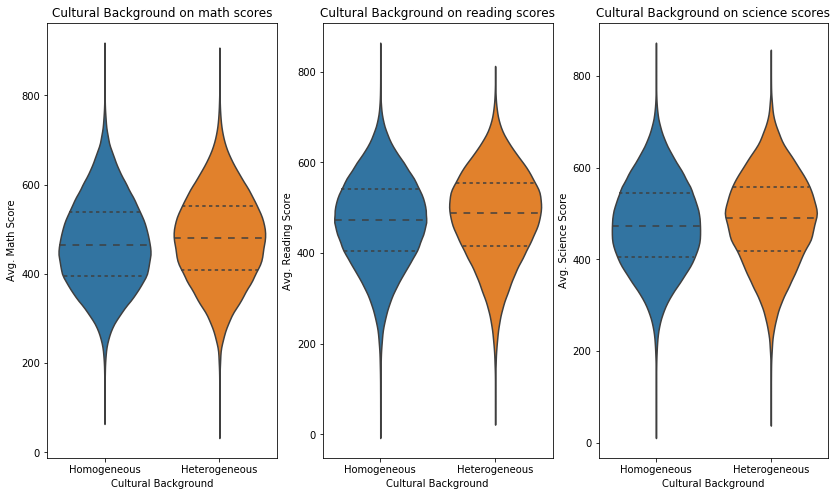

In [13]:
#now using a seaborn violinplot, order it and place the 'inner = 'quartile' for better visualization.
plt.figure(figsize = [14, 8])

plt.subplot(1, 3, 1)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Math Score'],
              inner = "quartile");
plt.title('Cultural Background on math scores');

plt.subplot(1, 3, 2)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Reading Score'],
              inner = "quartile");
plt.title('Cultural Background on reading scores');

plt.subplot(1, 3, 3)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Science Score'],
              inner = "quartile");
plt.title('Cultural Background on science scores');

## The role of parents.

The next graph shows the influence of parents on the results of boys and girls.
It can be seen that the results are significantly worse, especially in a house without parents.


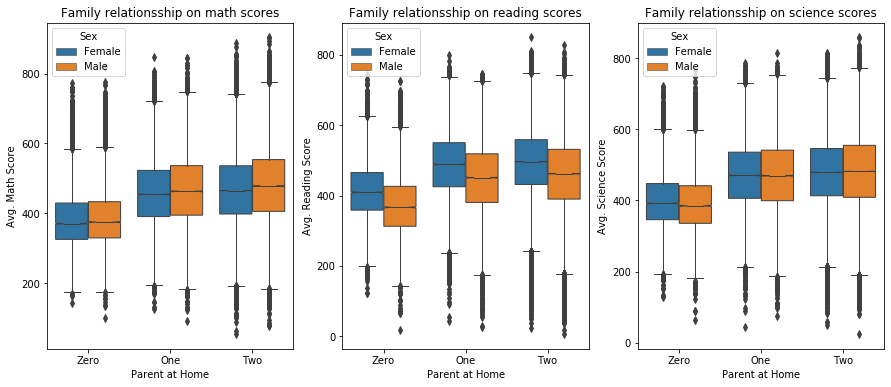

In [14]:
#using the seaborn boxplot again, but this time by adding hue.
plt.figure(figsize = [15, 6])

order = ['Zero', 'One', 'Two']
plt.subplot(1, 3, 1)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Math Score'], hue = pisa_clean['Sex'], 
           order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on math scores');

plt.subplot(1, 3, 2)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Reading Score'], hue = pisa_clean['Sex'],
           order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on reading scores');

plt.subplot(1, 3, 3)
sb.boxplot(x = pisa_clean['Parent at Home'], y = pisa_clean['Avg. Science Score'], hue = pisa_clean['Sex'],
           order=order, notch=True, width=0.8,
           linewidth=1);
plt.title('Family relationsship on science scores');

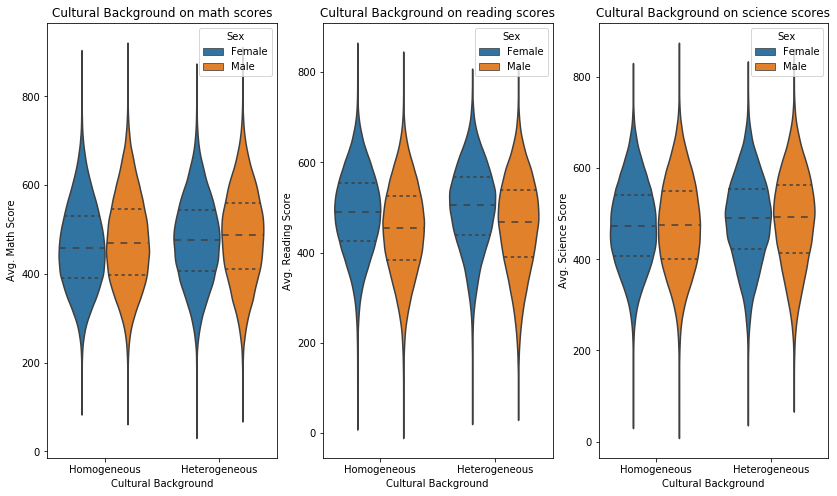

In [15]:
#using the seaborn violinplot again, but this time by adding hue.
plt.figure(figsize = [14, 8])

plt.subplot(1, 3, 1)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Math Score'], hue = pisa_clean['Sex'],
              inner = "quartile");
plt.title('Cultural Background on math scores');

plt.subplot(1, 3, 2)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Reading Score'], hue = pisa_clean['Sex'],
              inner = "quartile");
plt.title('Cultural Background on reading scores');

plt.subplot(1, 3, 3)
sb.violinplot(x = pisa_clean['Cultural Background'], y = pisa_clean['Avg. Science Score'], hue = pisa_clean['Sex'],
              inner = "quartile");
plt.title('Cultural Background on science scores');

In [35]:
#select onyl the european countrys in the dataset.
european_countries = ['Italy', 'Spain', 'United Kingdom','Bulgaria', 'Luxembourg',
                    'Russian Federation', 'Greece', 'Romania', 'Ireland', 'Croatia',
                    'Germany', 'Turkey', 'Hungary', 'Estonia', 'Sweden', 'Norway']

## Immigration Status by european countries

Finally, we look at the influence of the migration background in the individual European countries.
Here it can be seen that the migration background in the individual countries can in some cases have much stronger effects. 
This indicates that the chances of equality are less given in some countries than in others.

I will only show some selected countries in this slide.


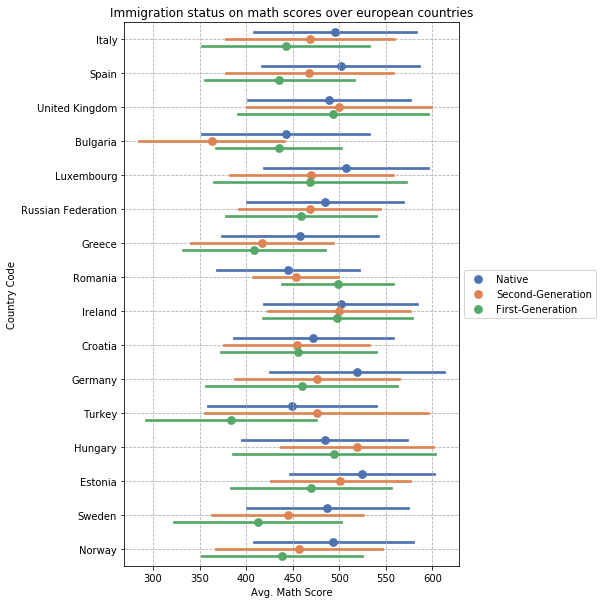

In [37]:
#post a seaborn pointplot.
plt.figure(figsize = [6, 10])

sb.pointplot(x = pisa_clean['Avg. Math Score'], y = pisa_clean['Country Code'], hue = pisa_clean['Immigration Status'],
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = european_countries);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(ls = '--')
plt.title('Immigration status on math scores over european countries');

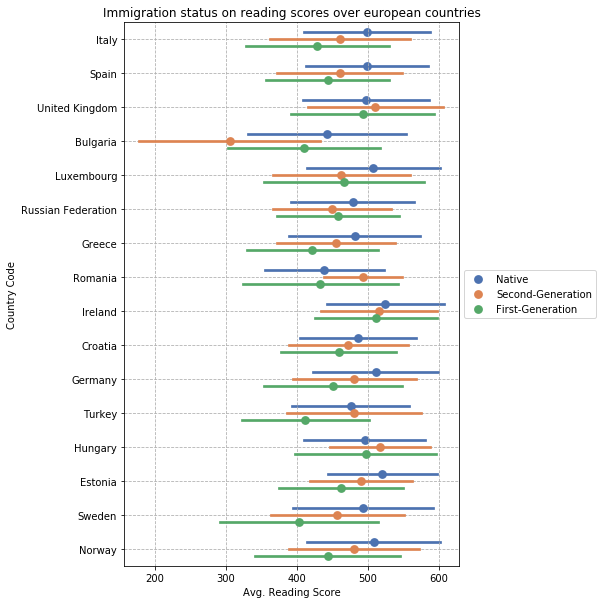

In [38]:
#post a seaborn pointplot.
plt.figure(figsize = [6, 10])

sb.pointplot(x = pisa_clean['Avg. Reading Score'], y = pisa_clean['Country Code'], hue = pisa_clean['Immigration Status'],
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = european_countries);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(ls = '--')
plt.title('Immigration status on reading scores over european countries');

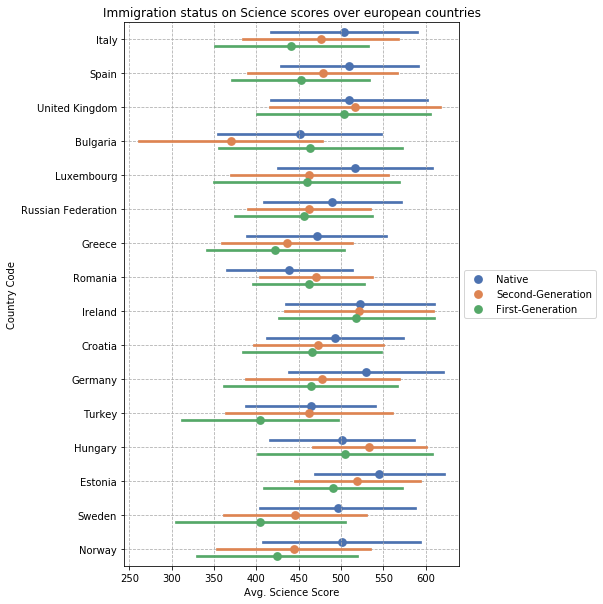

In [39]:
#post a seaborn pointplot.
plt.figure(figsize = [6, 10])

sb.pointplot(x = pisa_clean['Avg. Science Score'], y = pisa_clean['Country Code'], hue = pisa_clean['Immigration Status'],
             linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = european_countries);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(ls = '--')
plt.title('Immigration status on Science scores over european countries');

From the previous three graphs, it can be seen that equal opportunities seem to depend strongly on the European country in question. For example, the difference in the scores between 'native' and non-native in Germany is not so high. In Bulgaria, however, the difference is very significant.

It is also interesting to note that in our previous analysis we found little difference between immigration status and score. If we add the variable country code, we see that it can vary a lot from country to country.

# Insights and conclusion.

In summary, it can be said that the individual characteristics analysed (age, gender, family situation, immigration status and cultural background) always have a certain share in the results.

For example, we could observe that the youngest participants in the data set had significantly worse results.
We also see that girls and boys seem to have different strengths and weaknesses depending on their sex.

The role of parents also plays a very important role. If both parents are at home, the students achieve significantly better results than if there are no parents in the house. Students with parents from different cultural backgrounds also seem to be slightly better.

At first glance, the migration background did not seem to have much influence on the results. But if you look at the individual European countries in comparison, you can see that it has different influences from country to country. The immigrant background can be a significant hurdle to good results, depending on the country you grow up in.

In [40]:
!jupyter nbconvert exploration_template-slides3.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook exploration_template-slides3.ipynb to slides
[NbConvertApp] Writing 729513 bytes to exploration_template-slides3.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\LAPA001\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\LAPA001\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\LAPA001\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\LAPA001\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\LAPA001\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebo